# Regresja wielokrotna

- regresja wielokrotna
- jakość dopasowania

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


import matplotlib.pyplot as plt

In [5]:
carseats = sm.datasets.get_rdataset(dataname="Carseats", package="ISLR", cache=True)
carseats

<class 'statsmodels.datasets.utils.Dataset'>

In [4]:
carseats_df = carseats.data
carseats_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
carseats_df = pd.get_dummies(carseats_df,columns = ['ShelveLoc','Urban','US'],drop_first=True)
#one hot encoding w przypadku pandas-a, nie bierzemy kolumny dla bad bo współliniowość, tak samo dla No w Urban i US

In [7]:
carseats_df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,False,False,True,True
1,11.22,111,48,16,260,83,65,10,True,False,True,True
2,10.06,113,35,10,269,80,59,12,False,True,True,True
3,7.40,117,100,4,466,97,55,14,False,True,True,True
4,4.15,141,64,3,340,128,38,13,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,True,False,True,True
396,6.14,139,23,3,37,120,55,11,False,True,False,True
397,7.41,162,26,12,368,159,40,18,False,True,True,True
398,5.94,100,79,7,284,95,50,12,False,False,True,True


## Zadanie 1

1. Wyznacz liniową funkcję regresji opisującą zależność sprzedaży (`Sales`) od wysokości budżetu na reklamę (`Advertising`) i ceny (`Price`).


2. Zweryfikuj dopasowanie modelu `Sales ~ Advertising + Price`. Oblicz i zinterpretuj wartość współczynnika determinacji $R^2$.
    
       
3. Wyznacz model liniowy najlepiej opisujący zależność sprzedaży fotelików samochodowych od pozostałych dostępnych zmiennych. Oblicz i zinterpretuj wartość współczynnika determinacji $R^2$.

4. Zweryfikuj dopasowanie modelu `Sales ~ Advertising +Price+ShelveLoc+CompPrice+Income+Advertising+Price+Age`. Oblicz i zinterpretuj wartość współczynnika determinacji $R^2$.

5. Podaj przewidywaną wartość sprzedaży dla przypadku:  
`pd.DataFrame({
    'Sales': np.NaN,
    'CompPrice': [125.0],
    'Income': [70.0],
    'Advertising': [5.0],
    'Population': [270.0],
    'Price': [120.0],
    'ShelveLoc': ['Medium'],
    'Age': [54.0],
    'Education': [15.0],
    'Urban': ['Yes'],
    'US': ['Yes']
})`

6. Oceń jakość dopasowania.

In [8]:
X2, y = carseats_df.iloc[:, carseats_df.columns.isin(['Advertising','Price'])], carseats_df['Sales']

In [9]:
x2 = np.array(X2)
lm2 = LinearRegression()
lm2.fit(x2,y)
lm2.score(x2,y)
# wzrosl R^2, moze dorzucenie kolejnej zmiennej spowodowalo poprawienie modelu, troche, nie jakos znacznie

0.28185560334302273

In [10]:
X3 = carseats_df.iloc[:, carseats_df.columns!='Sales']

In [11]:
X3

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,False,False,True,True
1,111,48,16,260,83,65,10,True,False,True,True
2,113,35,10,269,80,59,12,False,True,True,True
3,117,100,4,466,97,55,14,False,True,True,True
4,141,64,3,340,128,38,13,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,True,False,True,True
396,139,23,3,37,120,55,11,False,True,False,True
397,162,26,12,368,159,40,18,False,True,True,True
398,100,79,7,284,95,50,12,False,False,True,True


In [12]:
x3 = np.array(X3)
lm3 = LinearRegression()
lm3.fit(x3,y)
lm3.score(x3,y)
# R^2 znacznie wzrosl - mamy dosc dobre dopasowanie

0.8734133434127013

In [13]:
X4 = carseats_df.iloc[:, carseats_df.columns.isin(['Advertising','Price','ShelveLoc_Good','ShelveLoc_Medium','CompPrice','Income','Age'])]

In [14]:
X4

,CompPrice,Income,Advertising,Price,Age,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,120,42,False,False
1,111,48,16,83,65,True,False
2,113,35,10,80,59,False,True
3,117,100,4,97,55,False,True
4,141,64,3,128,38,False,False
...,...,...,...,...,...,...,...
395,138,108,17,128,33,True,False
396,139,23,3,120,55,False,True
397,162,26,12,159,40,False,True
398,100,79,7,95,50,False,False


In [17]:
x4 = np.array(X4)
lm4 = LinearRegression()
lm4.fit(x4,y)
lm4.score(x4,y)

# R^2 dla X3 i X4 jest nieznacznie rozne
# trzeba sie zastanwoci czy rozszerzanie modelu o wiecej zmiennych mialo w ogole sens 
# to na koniec bedzie omowione w kontekscie istotnosci zmiennych

0.871982496884308

In [18]:
x_new = pd.DataFrame({ 'CompPrice': [125.0], 'Income': [70.0], 'Advertising': [5.0], 'Population': [270.0], 'Price': [120.0],'Age': [54.0],'Education': [15.0], 'ShelveLoc_Good': [False],
                       'ShelveLoc_Medium': [True],  'Urban_Yes': [True], 'US_Yes': [True] })

In [19]:
x_new

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,125.0,70.0,5.0,270.0,120.0,54.0,15.0,False,True,True,True


In [22]:
lm3.predict(np.array(x_new)) #trzeba pamietac o array bo inaczej bedzie blad

array([6.68993336])

In [ ]:
# Zobaczmy co by bylo gdyby na nowych danych uzylbym chudszego modelu czyli dla lm4

In [23]:
lm4.predict(np.array(x_new)) 
# i tu wywali blad bo nie mamy tej samej struktury danych w lm4

ValueError: X has 11 features, but LinearRegression is expecting 7 features as input.

# Graficzna ewaluacja modeli regresji:
- wykres wartości przewidywanych względem prawdziwych
- wykres residuów względem wartości dopasowanych

### Wykres wartości przewidywanych względem prawdziwych

$(y_i, \hat{y}_i)$

wykres wartości przewidywanych względem prawdziwych.

Przy idealnym dopasowaniu, punkty powinny się układać na prostej y=x.

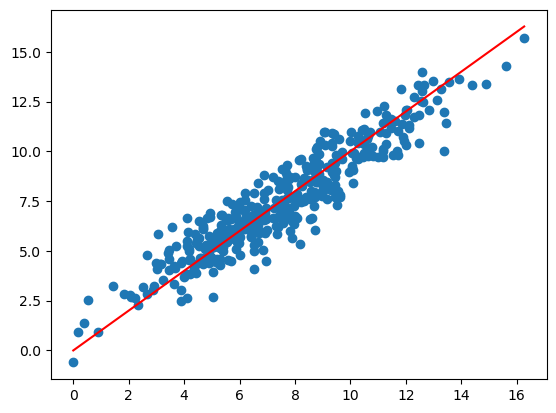

In [24]:
Ylin = np.linspace(carseats_df['Sales'].min(),carseats_df['Sales'].max(),100)
plt.scatter(carseats.data['Sales'],lm4.predict(x4))
plt.plot(Ylin,Ylin,color = 'red')
plt.show()
#tu jest bardzo dobre dopasowanie

## Wykres rezyduów:

1. $(i,e_i)$,

2. $(\hat{y}_i,e_i)$.

Oba wykresy powinny układać się wokół zera, bo błędy modelu mają średnią 0. Wspólna wariancja powinna się wyrażać tym, że żadna podgrupa punktów nie łapie większego odchylenia od prostej $y=0$

In [25]:
res = carseats.data['Sales']-lm4.predict(x4)

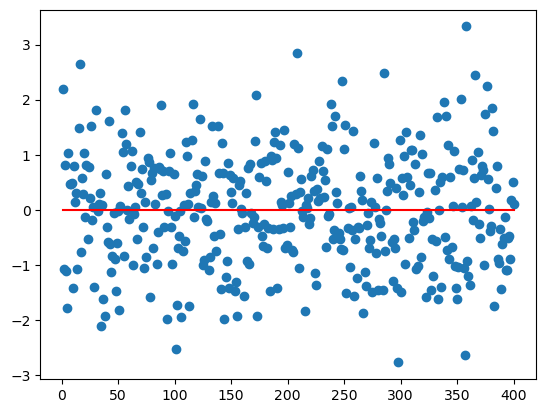

In [26]:
#1 (i,ei)
xrang = np.arange(1,len(res)+1)
plt.scatter(xrang,res)
plt.plot(xrang,np.repeat(0,len(xrang)),color = 'red')

In [ ]:
# jesli model jets dobrze dospaswany to zmienne powinny byc stabilnie rozrzucone wzgledem 0 (dosc losowo)
# wnioskowanie: moje bledy sa +- 2.5tys. 
# gdyby sie ukladaly w jakis ksztalt to by oznaczalo ze gdzoies w tych danych jest ukryta jakas zaleznosc nieliniowa
# inny problem - chumra bedzie waska i bedzie sie pote  rozszerzac - to tez nie jest dobra sytuacja bo to oznacza ze 
# nie zostalo spelnione zalozenie statystyczne, ze bledy powinny pochodzic z rozkladu normalnego o sredniej 0 i odch.stand. sigma
# wariancje obserwacji z malymi indeksami bylyby male a potem bylyby wieksze
# trpche teorii o tym bledzie sredniokwadratowym

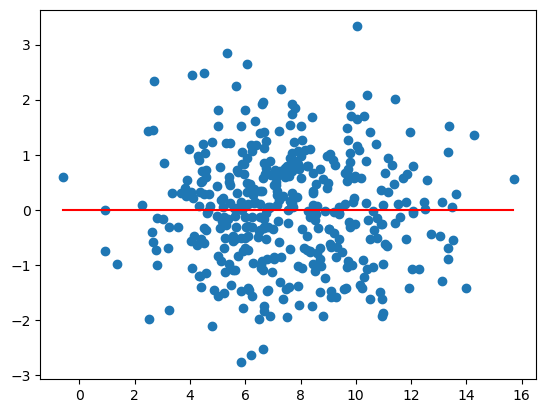

In [27]:
#2 (\hat{y}_i,ei)
xrang = np.arange(lm4.predict(x4).min(),lm4.predict(x4).max(),0.1)
plt.scatter(lm4.predict(x4),res)
plt.plot(xrang,np.repeat(0,len(xrang)),color = 'red')
#tu obydwa wykresy są ok

### Wykres kwantylowy dla reszt

Do badania normalności błędów

(reszty teoretyczne vs. reszty empiryczne)

Wykres powinnien układać sie na prostej $y=x$.

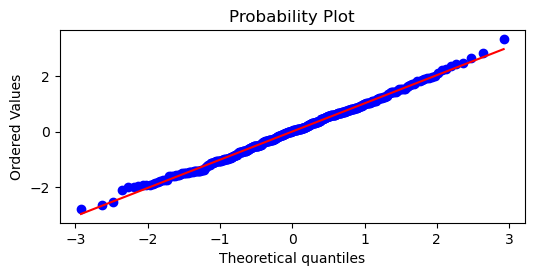

In [28]:
import scipy as sp
fig,ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(res,plot = ax,dist = 'norm',fit = True)
plt.show()

In [ ]:
# jest wokol prostej wiec wnioskujemy ze bledy maja rozklad normalny

# Zadanie 2

1. Wczytać dane `realest.csv`, które zawierają informacje na temat domów na przedmieściach Chicago: cena domu (`Price`), liczba sypialni (`Bedroom`), powierzchnia w stopach kwadratowych (`Space`), liczba pokoi (`Room`), szerokość frontu działki w stopach (`Lot`), roczny podatek od nieruchomości (`Tax`), liczba łazienek (`Bathroom`), liczba miejsc parkingowych w garażu (`Garage`) i stan domu (`Condition`, 0-dobry, 1-wymaga remontu).
       
2. Jaki wpływ na cenę ma zwiększenie liczby sypialni o 1,
 kiedy wartości wszystkich pozostałych zmiennych objaśniających są ustalone?
 Znaleźć uzasadnienie tego pozornie błędnego wyniku. Porównać ten wynik  z wynikiem otrzymanym dla modelu linowego opisującego zależność ceny domu jedynie od liczby sypialni.  

3. Podaj przewidywaną wartość sprzedaży dla przypadku:  
`pd.DataFrame({
    'Price': np.NaN,
    'Bedroom': [3.0],
    'Space': [1100],
    'Room': [6.0],
    'Lot': [32.0],
    'Tax': [911.0],
    'Bathroom': [1.5],
    'Garage': [1.0],
    'Condition': [0.0]
})`

4. Oceń jakość dopasowania.

In [29]:
#1
realest = pd.read_csv('realest.csv')
print(realest)
#są Na wyrzućmy je
realest = realest.dropna(axis =0)
print(realest)

     Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
0     53.0      2.0   967.0   5.0  39.0   652.0       1.5     0.0        0.0
1     55.0      2.0   815.0   5.0  33.0  1000.0       1.0     2.0        1.0
2     56.0      3.0   900.0   5.0  35.0   897.0       1.5     1.0        0.0
3     58.0      3.0  1007.0   6.0  24.0   964.0       1.5     2.0        0.0
4     64.0      3.0  1100.0   7.0  50.0  1099.0       1.5     1.5        0.0
..     ...      ...     ...   ...   ...     ...       ...     ...        ...
152   44.0      3.0   820.0   5.0  27.0     NaN       1.0     0.0        1.0
153   43.0      2.0   593.0   4.0  30.0   465.0       2.0     1.0        0.0
154   53.0      3.0   716.0   6.0  30.0   585.0       1.0     2.0        1.0
155   62.0      4.0   951.0   7.0  30.0   895.0       2.0     1.0        0.0
156    NaN      NaN     NaN   NaN   NaN     NaN       NaN     NaN        NaN

[157 rows x 9 columns]
     Price  Bedroom   Space  Room   Lot     Tax  Bat

In [31]:
#2
#model
X,y = realest.iloc[:, realest.columns!='Price'],realest['Price']

In [35]:
x1 = np.array(X)
lm1 = LinearRegression()
lm1.fit(x1,y)
lm1.coef_[0]

-3.1602387359607285

In [38]:
x_new = pd.DataFrame({ 'Bedroom': [3.0],  'Space': [1100],  'Room': [6.0],  'Lot': [32.0],  'Tax': [911.0],  'Bathroom': [1.5],  'Garage': [1.0],  'Condition': [0.0] })

In [39]:
x_new

,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,3.0,1100,6.0,32.0,911.0,1.5,1.0,0.0


In [41]:
lm1.predict(np.array(x_new)) #trzeba pamietac o array bo inaczej bedzie blad

array([56.56325512])

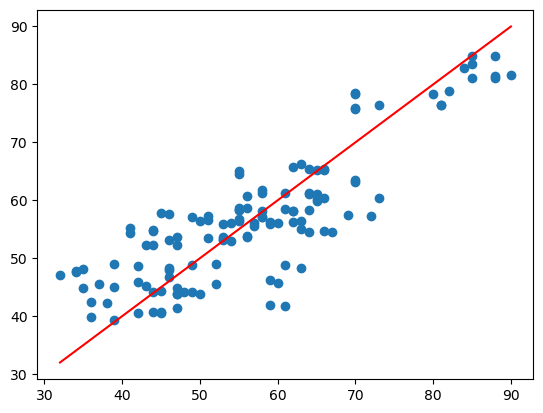

In [46]:
Ylin = np.linspace(y.min(),y.max(),100)
plt.scatter(y,lm1.predict(x1))
plt.plot(Ylin,Ylin,color = 'red')
plt.show()
# noie jest az tak dobre jak dla carseats


In [44]:
res = y-lm1.predict(x1)

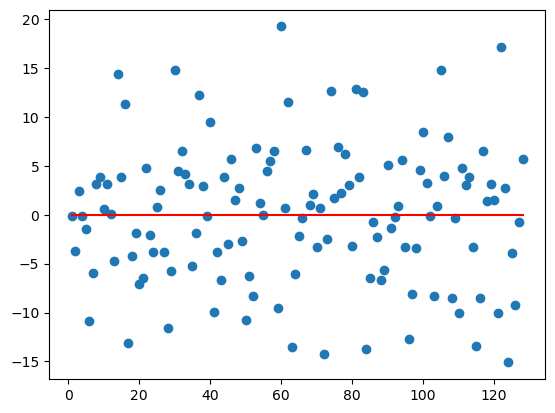

In [47]:
# wykres resyduow
xrang = np.arange(1,len(res)+1)
plt.scatter(xrang,res)
plt.plot(xrang,np.repeat(0,len(xrang)),color = 'red')

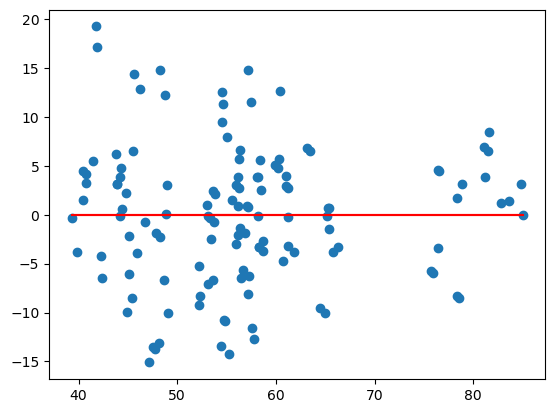

In [48]:
#2 (\hat{y}_i,ei)
plt.scatter(lm1.predict(x1),res)
plt.plot(lm1.predict(x1),np.repeat(0,len(xrang)),color = 'red')
#tu obydwa wykresy są ok

In [ ]:
# Wykres jest niejednoznaczny
# 
# dodatkowe info, nie bedzie tu: metoda wazona metoda najmniejszych kwadratow, wazony model liniowy


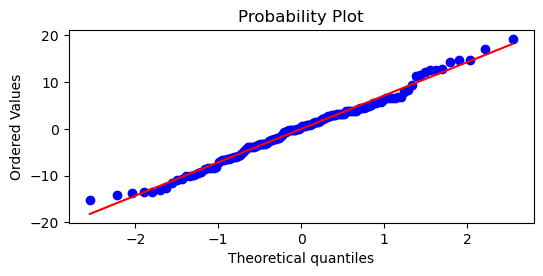

In [49]:
# wykres kwantylowy 
fig,ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(res,plot = ax,dist = 'norm',fit = True)
plt.show()

In [ ]:
# uklada sie mniej wiecej wzdluz prostej wiec jest ok